# Solution for Problem1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1.Data understanding and exploration


In [2]:
df=pd.read_csv('data_1.csv')

In [4]:
df.head(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
df.shape

(301, 9)

In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [11]:
df.nunique().sort_values()

Seller_Type        2
Transmission       2
Fuel_Type          3
Owner              3
Year              16
Car_Name          98
Present_Price    147
Selling_Price    156
Kms_Driven       206
dtype: int64

In [12]:
print(df['Seller_Type'].unique())

['Dealer' 'Individual']


In [13]:
print(df['Transmission'].unique())

['Manual' 'Automatic']


In [14]:
print(df['Fuel_Type'].unique())

['Petrol' 'Diesel' 'CNG']


In [15]:
print(df['Owner'].unique())

[0 1 3]


# 3.Data preparation

# Checking null values

In [16]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [17]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


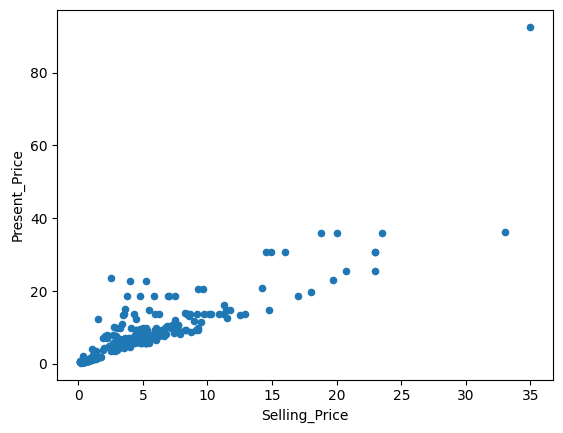

In [18]:
df.plot.scatter(x='Selling_Price', y='Present_Price');

<AxesSubplot: xlabel='Year', ylabel='count'>

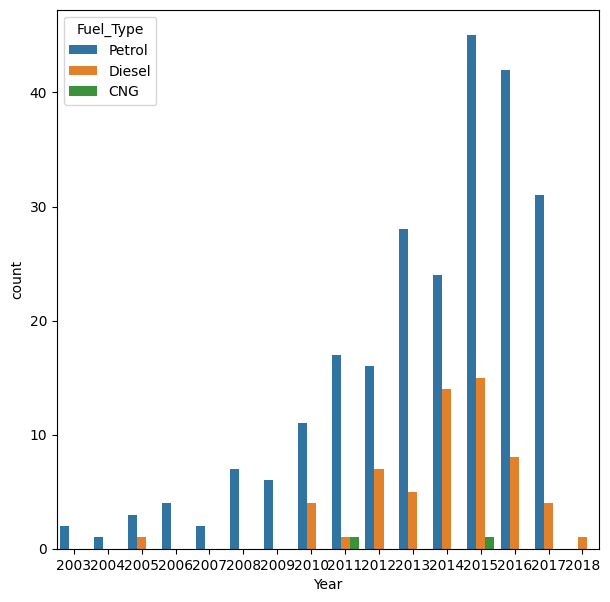

In [20]:
plt.figure(figsize=(7,7))
sns.countplot(x='Year',hue='Fuel_Type',data=df)

In [21]:
#As we can see for every year petrol cars and bike are morefor selling than diesel and CNG

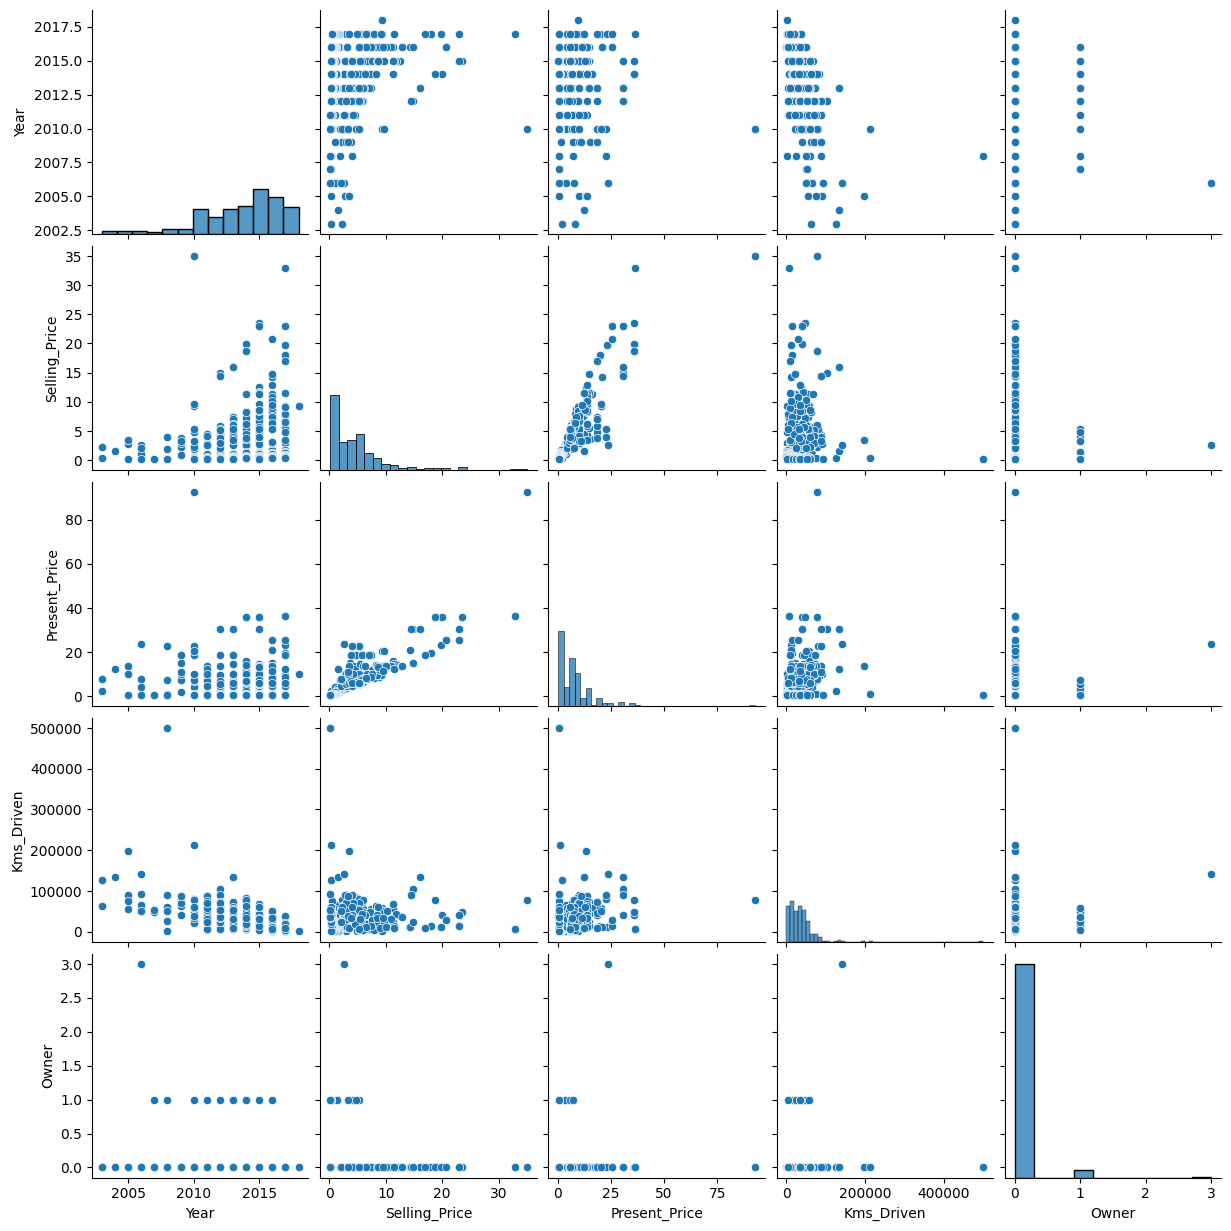

In [26]:
sns.pairplot(df)

# get correlations of each features in dataset

<AxesSubplot: xlabel='Selling_Price', ylabel='Kms_Driven'>

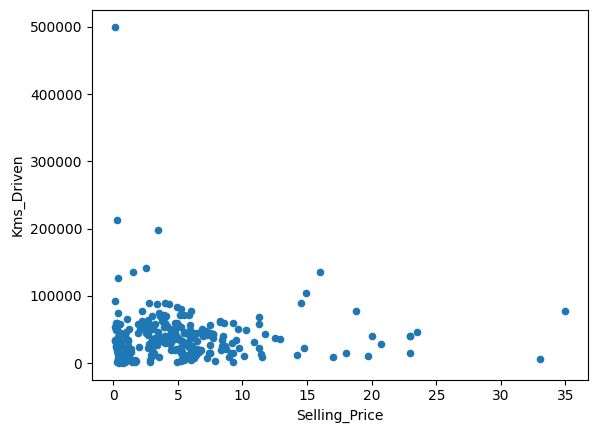

In [30]:
df.plot.scatter('Selling_Price','Kms_Driven')

<AxesSubplot: xlabel='Selling_Price', ylabel='Transmission'>

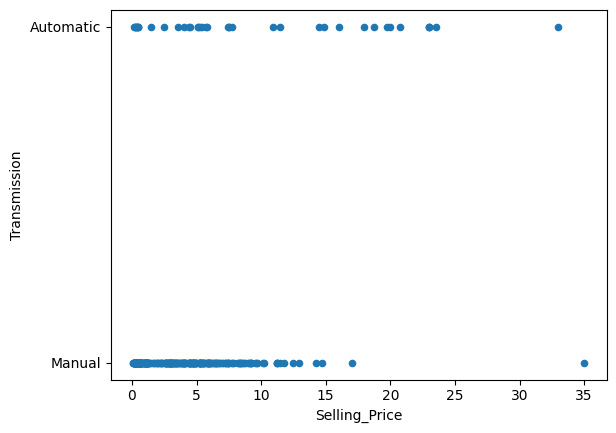

In [31]:
df.plot.scatter('Selling_Price','Transmission')

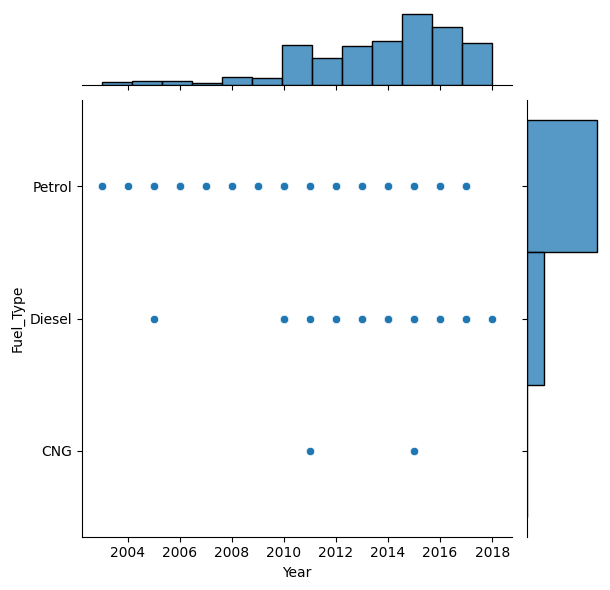

In [32]:
sns.jointplot(data=df, x="Year", y="Fuel_Type")

# 2.Data cleaning

# Finding Outliers

<AxesSubplot: xlabel='Selling_Price', ylabel='Seller_Type'>

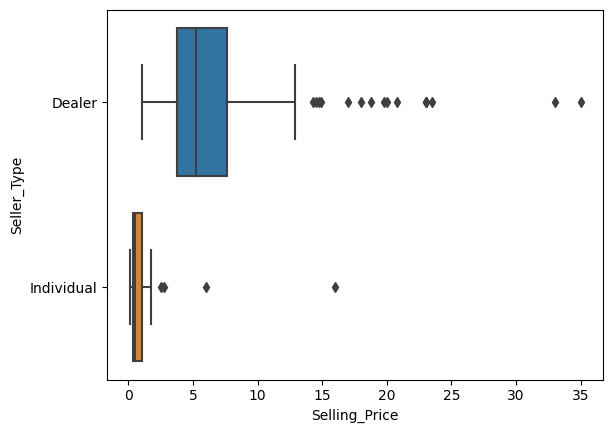

In [33]:
sns.boxplot(x='Selling_Price', y="Seller_Type", data=df)

<AxesSubplot: xlabel='Year', ylabel='Selling_Price'>

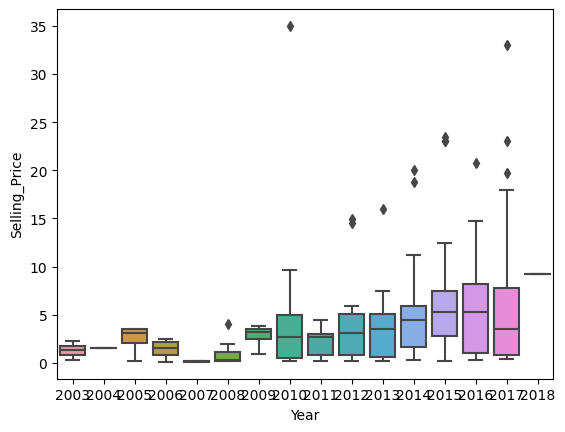

In [34]:
sns.boxplot(x='Year', y="Selling_Price", data=df)

In [35]:
#Dropping car name columns as it has many number of unique columns as our dataset is very short

In [36]:
df.drop('Car_Name',axis=1,inplace=True)
df.head(2)

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0


# 3.Data Preperation

In [ ]:
#converting Year column into number of years selling car is old

In [42]:
df['curr_Year']=2020
df['Years']=df.curr_Year - df.Years
df.drop(['Years','curr_Year'],axis=1,inplace=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [43]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,0,1,0,1
1,4.75,9.54,43000,0,1,0,0,1
2,7.25,9.85,6900,0,0,1,0,1
3,2.85,4.15,5200,0,0,1,0,1
4,4.60,6.87,42450,0,1,0,0,1


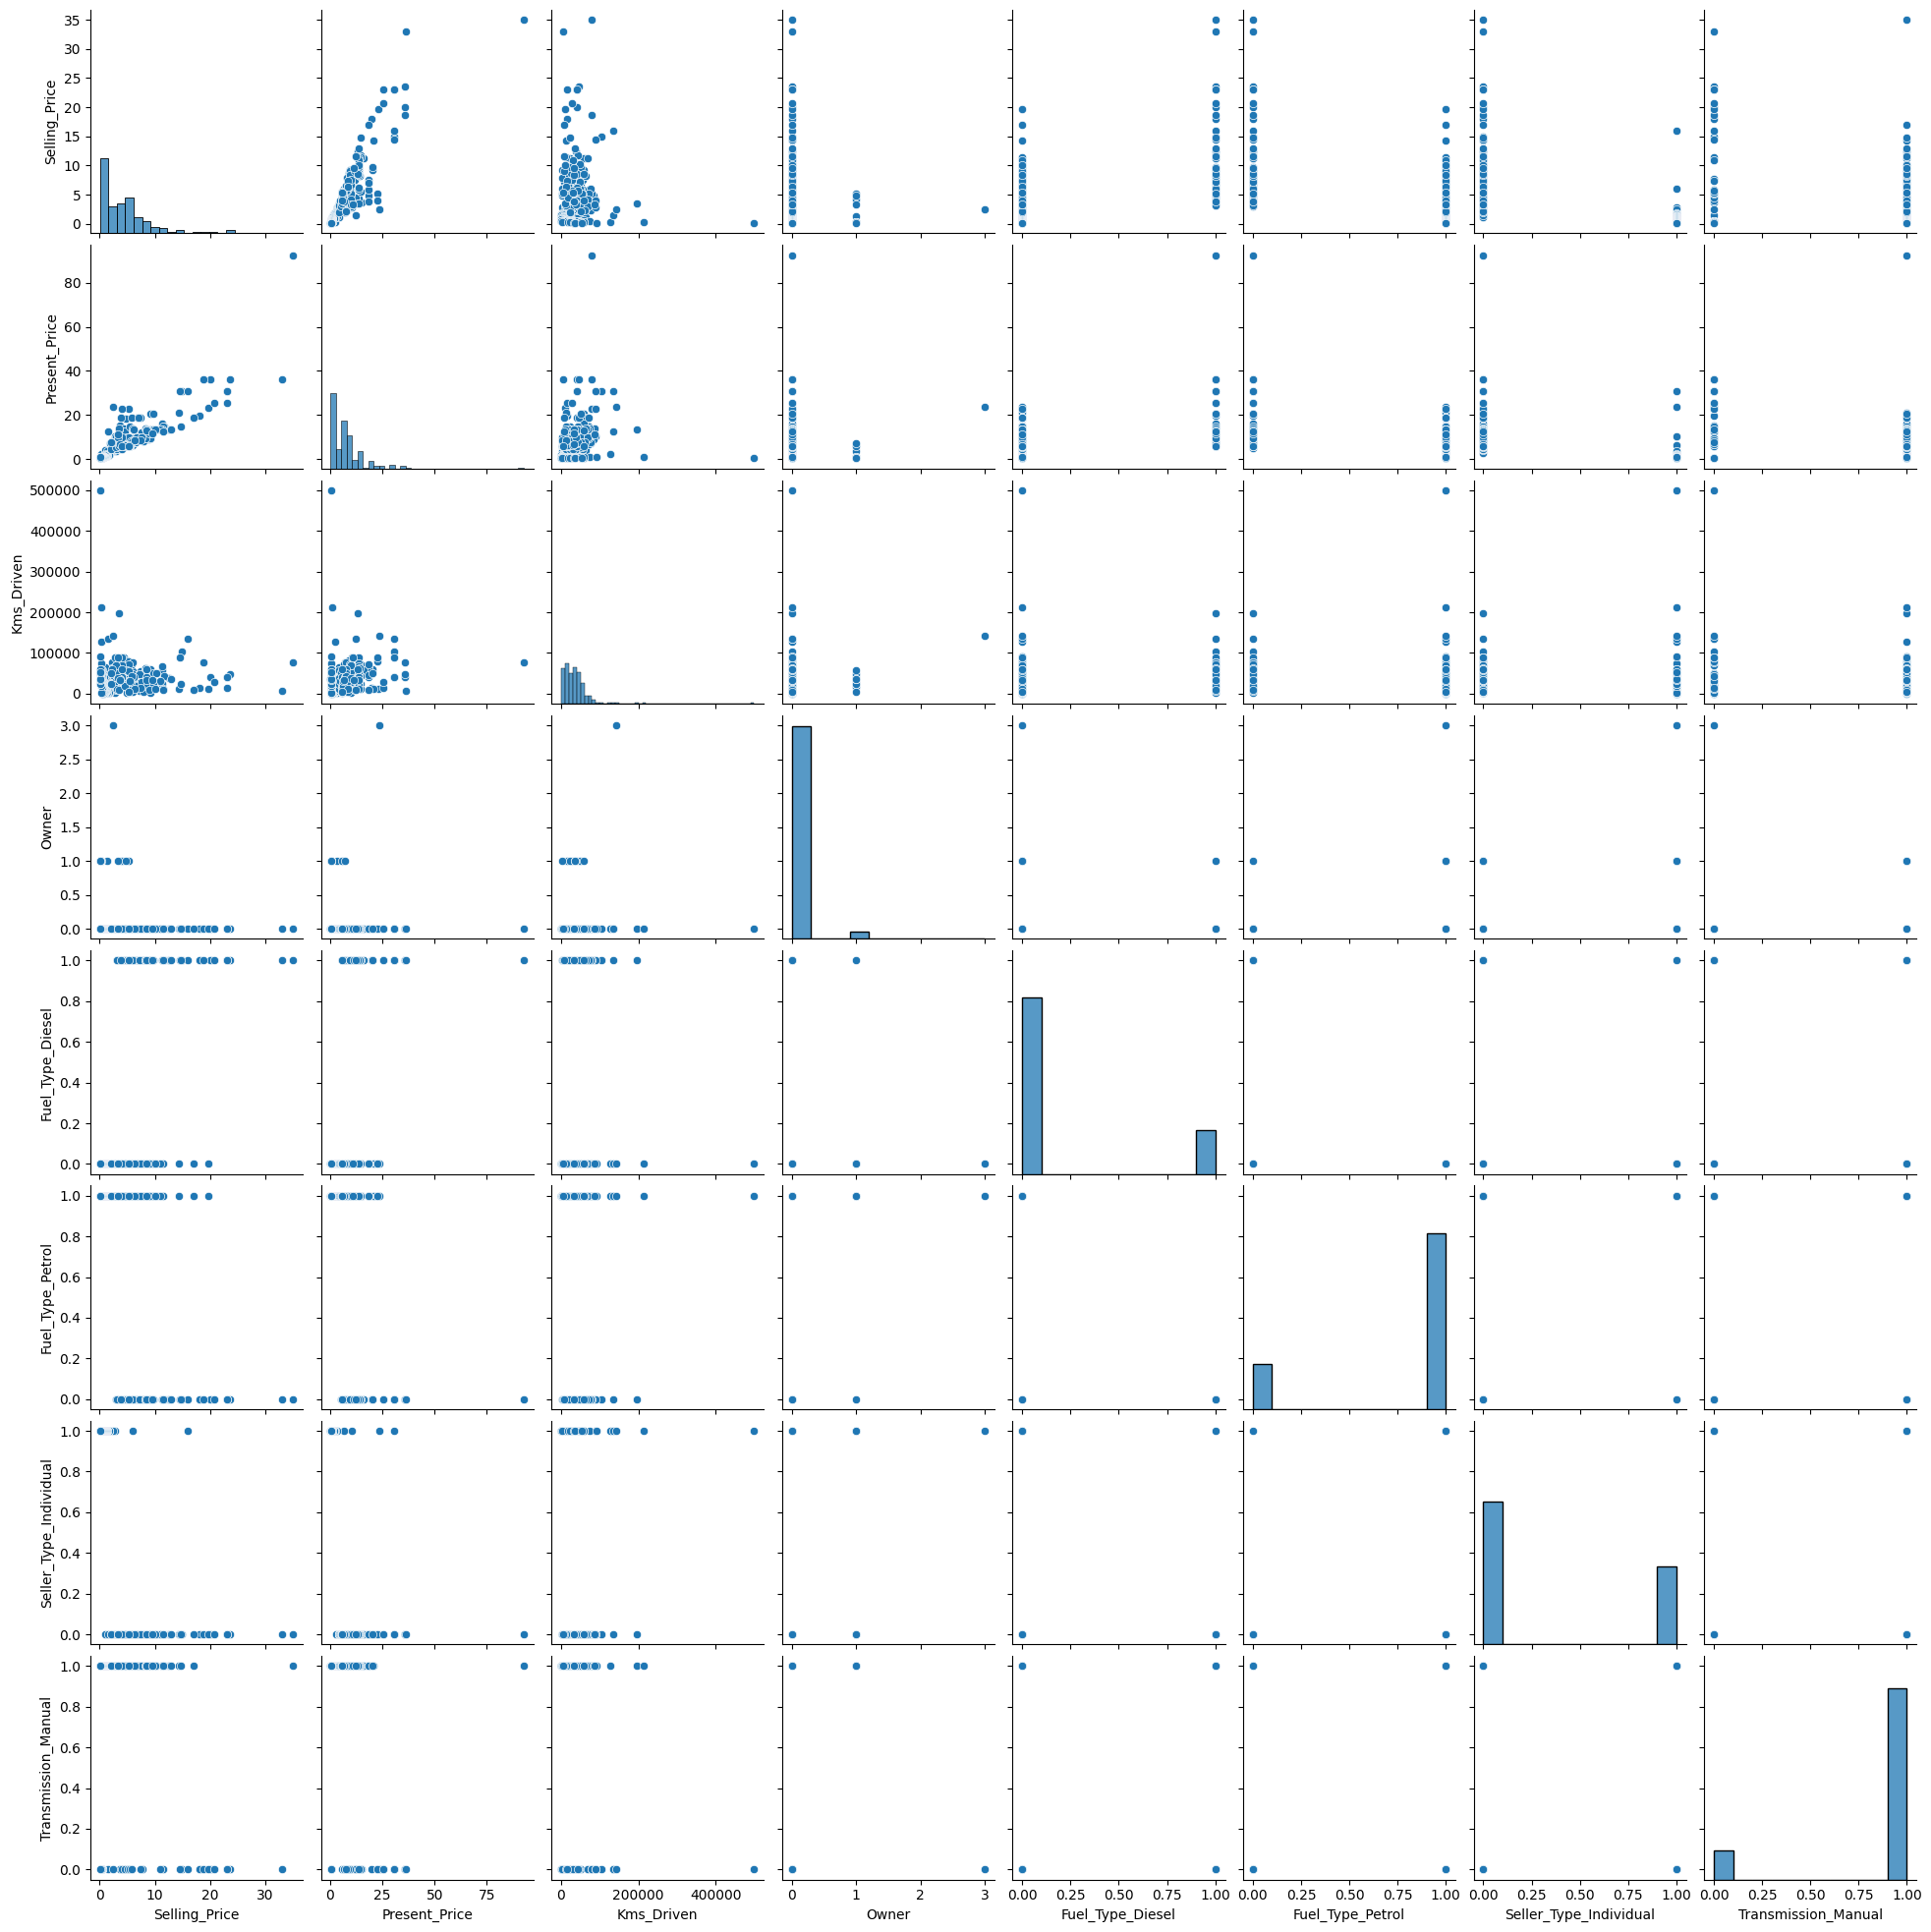

In [44]:
sns.pairplot(data=df)

# plotting corelation between dataset column by using heatmap

<AxesSubplot: >

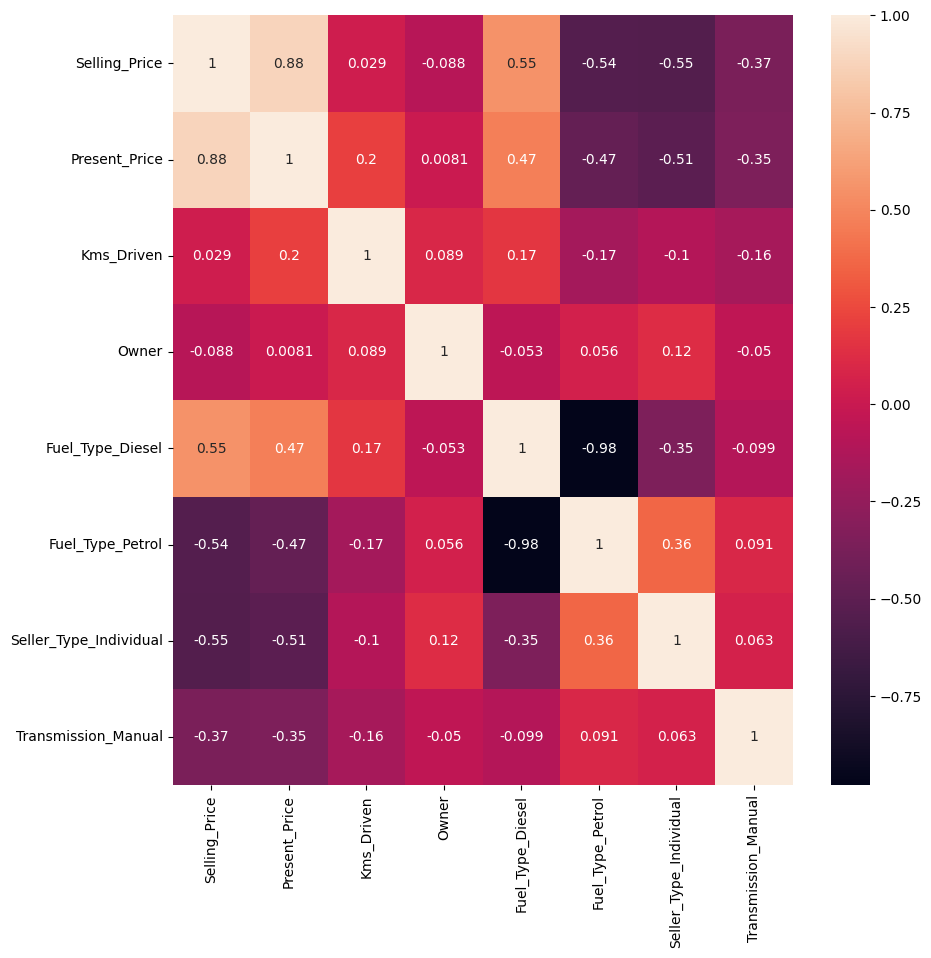

In [45]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

# 4.Model building and evaluation

In [46]:
#taking dependent and inpendent columns into different variables

In [48]:
X=df.drop('Selling_Price',axis=1)
y=df['Selling_Price']

In [49]:
X

,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,0,1,0,1
1,9.54,43000,0,1,0,0,1
2,9.85,6900,0,0,1,0,1
3,4.15,5200,0,0,1,0,1
4,6.87,42450,0,1,0,0,1
...,...,...,...,...,...,...,...
296,11.60,33988,0,1,0,0,1
297,5.90,60000,0,0,1,0,1
298,11.00,87934,0,0,1,0,1
299,12.50,9000,0,1,0,0,1


In [50]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [51]:
X.shape

(301, 7)

In [52]:
y.shape

(301,)

In [56]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

NameError: name 'X_train' is not defined

In [57]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [59]:
print(X_train[0])
print(X_test[0])

[0.00465973 0.05105105 0.33333333 0.         1.         1.
 1.        ]
[0.00270915 0.04704705 0.         0.         1.         1.
 0.        ]


# Random Forest Regression

In [62]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9228418166365415

In [71]:
y_pred=model.predict(X_test)
y_pred

array([ 0.27      , 10.8659    ,  5.3355    ,  0.2213    ,  8.7862    ,
        5.641875  ,  1.1028    ,  0.6314    ,  0.4154    ,  6.2925    ,
        7.5387    ,  1.0885    ,  9.067     ,  0.4405    ,  5.707375  ,
        1.867     ,  1.149     , 12.7326    ,  0.4178    ,  1.576     ,
        0.5528    ,  8.31141667,  5.33345   ,  2.98      ,  0.4995    ,
        3.9575    ,  4.9165    ,  4.1595    ,  1.1193    ,  1.1769    ,
        0.5438    ,  9.9135    ,  0.5319    ,  3.6435    ,  7.435     ,
        4.052     ,  5.3865    ,  7.5765    ,  2.6055    ,  7.5355    ,
        5.295     ,  3.8522    ,  5.3565    ,  0.5639    ,  5.65883333,
        0.8027    ,  8.5545    ,  6.943     ,  2.905     ,  3.6075    ,
        6.06646667,  1.4525    , 21.3138    , 20.6883    ,  5.18      ,
       10.007     ,  5.088     ,  8.37116667,  3.8925    ,  6.858     ,
        0.3443    ])